In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import os
from torchvision import datasets, transforms, models
from skimage import io, transform
import matplotlib.pyplot as plt
from torch import nn, optim
from time import time

In [2]:
train_trainsforms = transforms.Compose([transforms.Resize((200,200)),
                                            transforms.ToTensor(),
                                            transforms.Normalize((0.5,), (0.5,)),])
    
test_trainsforms = transforms.Compose([transforms.Resize((200,200)),
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.5,), (0.5,)),])

In [3]:
train_data= datasets.ImageFolder('New_data_train/',transform=train_trainsforms)
test_data = datasets.ImageFolder('New_data_test/',transform=test_trainsforms)

In [4]:
num_train = len(train_data)                               
indices = list(range(num_train))   

In [5]:
num_test = len(test_data)                               
indices = list(range(num_test))

In [6]:
torch.manual_seed(9)
train_loader =  torch.utils.data.DataLoader(train_data,batch_size=32,shuffle=True)
test_loader =  torch.utils.data.DataLoader(test_data,batch_size=32,shuffle=True)

In [9]:
dataiter = iter(train_loader)
images, labels = next(dataiter)  # Use next(dataiter) instead of dataiter.next()
images = images[:,0,:,:]
print(images.shape)
print(labels.shape)

torch.Size([32, 200, 200])
torch.Size([32])


In [10]:
print(labels)

tensor([4, 0, 2, 3, 3, 2, 1, 0, 2, 4, 1, 3, 4, 3, 4, 4, 4, 5, 1, 0, 2, 5, 4, 5,
        5, 2, 3, 0, 0, 5, 3, 5])


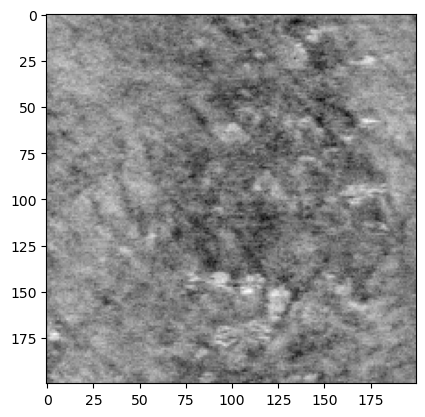

In [13]:
plt.imshow(images[0], cmap='gray_r');

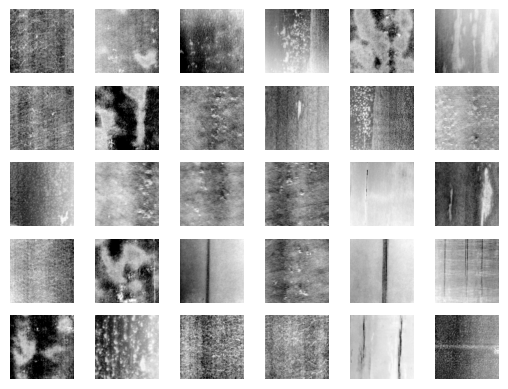

In [14]:
figure = plt.figure()
num_of_images = 30
for index in range(1, num_of_images+1):
    plt.subplot(5, 6, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [20]:
input_size = 120000

hidden_sizes = [512,256,128,64]
output_size = 6

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=120000, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=6, bias=True)
  (9): LogSoftmax(dim=1)
)


In [21]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))

#view(a, b)` will return a new tensor with the same data as `images` with size `(a, b)`.
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities, the output of our neural network model
loss = criterion(logps, labels) #calculate the NLL loss

In [22]:
images.shape

torch.Size([32, 120000])

In [23]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.0230e-04, -1.0990e-04, -1.2146e-04,  ..., -1.5496e-04,
         -1.5557e-04, -1.4186e-04],
        [-4.3140e-04, -4.4820e-04, -5.0267e-04,  ..., -5.0754e-04,
         -4.8110e-04, -5.1316e-04],
        [-1.0615e-05, -1.6951e-05, -1.3436e-05,  ...,  6.7413e-05,
          4.4482e-05,  3.4271e-05],
        ...,
        [-1.3349e-04, -1.3880e-04, -1.3362e-04,  ..., -2.7027e-04,
         -2.3562e-04, -2.4668e-04],
        [-7.5457e-06, -3.8684e-05, -3.5355e-05,  ...,  1.7677e-05,
          1.9599e-05,  1.1165e-05],
        [-6.6562e-05, -5.2315e-05, -5.5370e-05,  ..., -7.1056e-06,
          1.5161e-05,  6.8935e-06]])


In [24]:
#the Stochastic Gradient Descent optimizer
#momentum is a parameter that will avoid us getting stuck into a local minimum : a value between 0 and 1
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
torch.manual_seed(9)

#number of feedforward and backpropagation iterations that we will do to train the network
epochs = 20
for e in range(epochs):
    #we start with an error or loss of zero
    running_loss = 0
    
    #Iteration through the images dataset
    for images, labels in train_loader:
        
        # Flatten images into a long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 1.705767322989071
Epoch 1 - Training loss: 1.5684318799598544
Epoch 2 - Training loss: 1.4259337256936466
Epoch 3 - Training loss: 1.2613032471899892
Epoch 4 - Training loss: 1.1513259691350601
Epoch 5 - Training loss: 1.0828313196406645
Epoch 6 - Training loss: 1.0243150287983465
Epoch 7 - Training loss: 0.9485477103906519
Epoch 8 - Training loss: 0.887947206403695
Epoch 9 - Training loss: 0.7852436374215519
Epoch 10 - Training loss: 0.7516458227353937
Epoch 11 - Training loss: 0.6922121988792046
Epoch 12 - Training loss: 0.6174234210276136
Epoch 13 - Training loss: 0.5801912008547315
Epoch 14 - Training loss: 0.628911131737279
Epoch 15 - Training loss: 0.5418809997100457
Epoch 16 - Training loss: 0.4638424436835682
Epoch 17 - Training loss: 0.4168661701328614
Epoch 18 - Training loss: 0.42143384089656905
Epoch 19 - Training loss: 0.36919715270107867

Training Time (in minutes) = 5.368152892589569


In [25]:
torch.manual_seed(9)
correct_count, all_count = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 120000)
    #torch.no_grad(): Context-manager that disabled gradient calculation
    with torch.no_grad():
        logps = model(img)

    #get the scores obtained for each class. 
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    
    #choose the one having the maximum score and compare it to the real label
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nNumber of images predicted correctly =", correct_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 180

Number of images predicted correctly = 78

Model Accuracy = 0.43333333333333335


In [26]:
torch.manual_seed(1)
images, labels = next(iter(test_loader))
image = images[0]
label = labels[0]

img = image.view(1, 120000)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted metal surface defect =", probab.index(max(probab)))
print("Label =", labels[0])

Predicted metal surface defect = 1
Label = tensor(1)


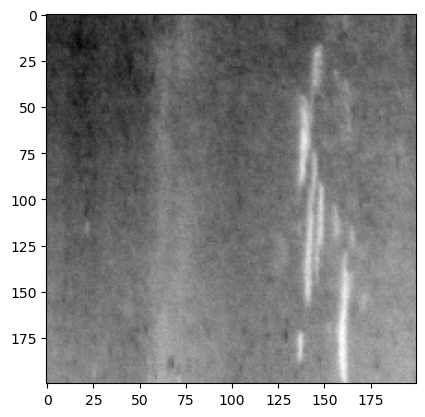

In [27]:
image = image[0]
plt.imshow(image, cmap='gray_r');